<a href="https://colab.research.google.com/github/Sruthi-Reddy-B/Insurance_claim_prediction/blob/main/notebooks/eda_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone your repo
!git clone https://github.com/Sruthi-Reddy-B/Insurance_claim_prediction.git
%cd Insurance_claim_prediction

Cloning into 'Insurance_claim_prediction'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 88 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 34.41 KiB | 8.60 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [5]:
#if git repo not cloned
'''import pandas as pd

# Load CSV from GitHub directly
url = "https://raw.githubusercontent.com/Sruthi-Reddy-B/Insurance_claim_prediction/main/data/sample_claims.csv"

data = pd.read_csv(url)
data.head()'''

!ls

app  data  LICENSE  notebooks  README.md  requirements.txt  results  src


In [ ]:
# Install necessary packages
#!pip install -q pandas numpy scikit-learn matplotlib seaborn joblib
!pip install -r requirements.txt -q


# Insurance Claim Prediction — End-to-End ML Pipeline

## 1. Load Data

In [6]:
import pandas as pd

data = pd.read_csv('./data/sample_claims.csv')
data.head()

,Age,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Previously_Claimed,Claim_Approved
0,25,2,Yes,152,150,0,1
1,45,5,No,26,300,1,0
2,30,1,Yes,152,200,0,1
3,50,3,No,152,100,1,0
4,35,2,Yes,26,250,0,1


## 2. Data Preprocessing

In [7]:

# Convert categorical variables
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes':1,'No':0})

# Split features and target
X = data.drop('Claim_Approved', axis=1)
y = data['Claim_Approved']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



## 3. Train Model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## 4. Save Model


In [10]:
import joblib
import os

# Ensure src folder exists
os.makedirs('./src', exist_ok=True)

# Save model
joblib.dump(model, './src/claim_model.pkl')
print("Model saved as claim_model.pkl in ./src/")



['./src/claim_model.pkl']

## 5. Results Visualization

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


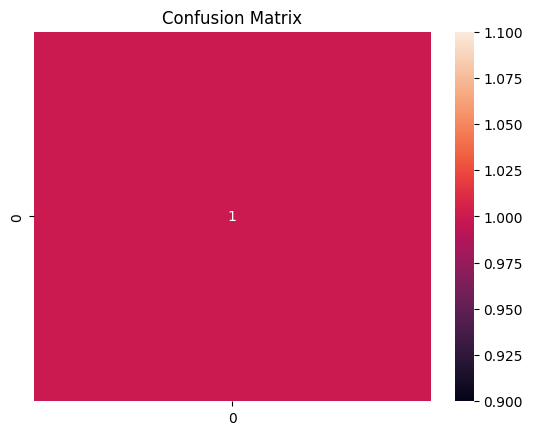

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Insurance Claim Prediction")
plt.show()

#6. Export results

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix — Insurance Claim Prediction")
plt.savefig('./results/confusion_matrix.png', bbox_inches='tight')
print("✅ Confusion matrix saved to ./results/confusion_matrix.png")